In [1]:
import ctypes
import numpy as np
import time


In [2]:
# Load the shared library into ctypes
clibrary = ctypes.CDLL('./clibrary.dll')

In [3]:
def rnd_search(array,x):
    length = len(array)
    clibrary.random_search.argtypes = [ctypes.POINTER(ctypes.c_int), ctypes.c_int, ctypes.c_int]
    array = (ctypes.c_int * length)(*array)
    found_index=clibrary.random_search(array, length,x)
    return found_index

In [4]:
array_aleatorio=np.random.randint(0,10,10)


print("Our random array is: ",array_aleatorio)
number=8
print('we are looking for',number)
index=rnd_search(array_aleatorio,number)
print("The index of the searched element is: ",index)

Our random array is:  [6 7 0 3 8 1 7 7 3 6]
we are looking for 8
The index of the searched element is:  4


measure the time complexity
===

In [5]:
def time_complexity(max_size,step_size,mean_size):
    #create random arrays of diferent sizes donde no se repitan los numeros
    time_per_size=[]
    for i in range(step_size,max_size,step_size):

        tiempos=[]
        for j in range (mean_size):
            array_aleatorio=np.random.choice(np.arange(0,i,1),i,replace=False)

            #define tiempo inicial
            random_num_to_search=np.random.randint(0,i,1)
            random_num_to_search=random_num_to_search[0]
            t1=time.time()
            index=rnd_search(array_aleatorio,random_num_to_search)
            #define tiempo final
            t2=time.time()
            tiempos.append(t2-t1)
        #promediar los tiempos
        tiempo_promedio=np.mean(tiempos)
        time_per_size.append(tiempo_promedio)
    return time_per_size

m es:  2.6931150649981914e-07
b es:  3.762771859829558e-06


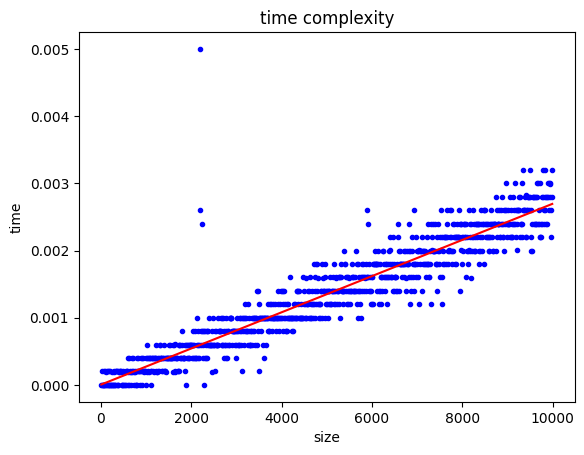

"\n#plot time per size\nimport matplotlib.pyplot as plt\nsize=np.arange(10,10000,10)\nplt.plot(size,time_per_size)\nplt.ylabel('time')\nplt.xlabel('size')\nplt.title('time complexity')\nplt.show()\n"

In [7]:
time_per_size=time_complexity(10000,10,5)
#adjust a lineal function
time_per_size=np.array(time_per_size)
size=np.arange(10,10000,10)
m,b=np.polyfit(size,time_per_size,1)
y=m*size+b

#plot time per size and lineal function
import matplotlib.pyplot as plt
size=np.arange(10,10000,10)
plt.plot(size,time_per_size,'.b')
plt.plot(size,y,'-r')
plt.ylabel('time(s)')
plt.xlabel('Size of array')
plt.title('Complexity')
plt.show()




